<a href="https://colab.research.google.com/github/nehagupta2103/Image-Compression-using-K-Means/blob/main/Image_compression_using_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing reqd libraries

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv2.imread('drive/My Drive/CV projects/Image segmentation/originalimage.jpg') 

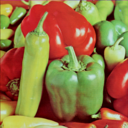

In [ ]:
cv2_imshow(img)  # cv2 stores colors as BGR; convert to RGB

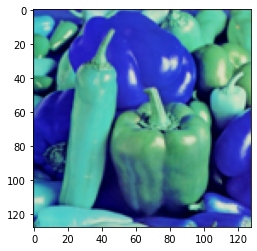

In [ ]:
plt.imshow(img)

In [ ]:
img.dtype

dtype('uint8')

In [ ]:
y = img.shape[0]
x = img.shape[1]
print(y)
print(x)

128
128


In [ ]:
for i in range(0,y):
  for j in range(0,x):
    img[i][j]              #value of single pixel
    #print(img[i][j])

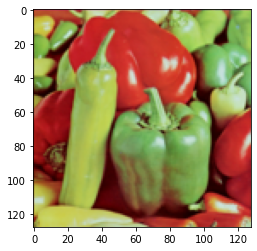

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,[2,1,0]]) #matplotlib uses RGB, CV2 uses BGR

In [ ]:
array = np.array(img)
array

array([[[ 54,  60, 168],
        [ 66,  70, 177],
        [ 68,  68, 179],
        ...,
        [106, 165, 169],
        [104, 164, 166],
        [100, 160, 149]],

       [[ 38,  71, 175],
        [ 46,  85, 187],
        [ 45,  83, 184],
        ...,
        [ 88, 207, 162],
        [ 88, 204, 161],
        [ 85, 200, 147]],

       [[ 35,  67, 168],
        [ 43,  83, 186],
        [ 41,  81, 183],
        ...,
        [ 89, 202, 159],
        [ 87, 199, 155],
        [ 84, 198, 146]],

       ...,

       [[ 39, 102, 138],
        [ 63, 160, 150],
        [ 66, 159, 164],
        ...,
        [132, 172, 164],
        [146, 199, 177],
        [157, 206, 184]],

       [[ 42, 112, 126],
        [ 54, 140, 137],
        [ 73, 166, 170],
        ...,
        [173, 207, 182],
        [165, 205, 178],
        [168, 210, 184]],

       [[ 41, 104, 122],
        [ 49, 124, 127],
        [ 74, 168, 169],
        ...,
        [178, 212, 183],
        [175, 213, 182],
        [164, 206, 180]]

In [ ]:
#randomly allocating 16 centroids using random lib

import random

y = img.shape[0]
x = img.shape[1]

centroids = []

for i in range(0,16):
  val = np.random.randint(0,x)
  value = np.random.randint(0,y)
  centroids.append(array[val][value])

print(centroids)

[array([ 67, 180, 128], dtype=uint8), array([ 58, 128, 124], dtype=uint8), array([ 83, 203, 200], dtype=uint8), array([ 9,  7, 72], dtype=uint8), array([ 41,  49, 197], dtype=uint8), array([168, 215, 190], dtype=uint8), array([ 90, 160, 121], dtype=uint8), array([ 64, 128,  92], dtype=uint8), array([113, 209, 175], dtype=uint8), array([ 83, 160, 130], dtype=uint8), array([ 81, 175, 188], dtype=uint8), array([ 39,  45, 193], dtype=uint8), array([ 85, 161, 130], dtype=uint8), array([ 87, 209, 165], dtype=uint8), array([101, 124, 217], dtype=uint8), array([ 79, 181, 163], dtype=uint8)]


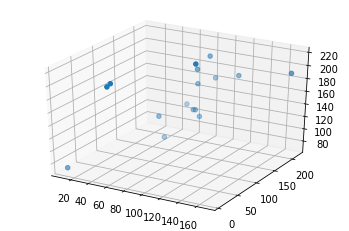

In [ ]:
#plotting centroids on matplotlib

from mpl_toolkits import mplot3d
x = []
y = []
z = []
for i in range(0,16):
   x.append(np.array(centroids[i][0]))
   y.append(np.array(centroids[i][1]))
   z.append(np.array(centroids[i][2]))  
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(x,y,z)
plt.show()

In [ ]:
#assigning each pixel a set by selecting it's nearest centroid

from scipy.spatial import distance   #lib used to calculate euclidean distance

y = img.shape[0]
x = img.shape[1]

rows, cols = 16, (x*y)    
arr = [[0 for i in range(cols)] for j in range(rows)] #initializing each element of matrix by 0

for i in range(0,x):
     for j in range(0, y):
          min = 1000000
          index = -1
          for k in range(0, 16):
                d = distance.euclidean(centroids[k],array[i][j])
                if(d < min):
                     min = d
                     index = k
                     
          arr[index][x*i+j] = 1


In [ ]:
array = array.astype(object) #changing datatype of array for summation

In [ ]:
#recomputing centroid by calculating mean of the points of its respective set

y = img.shape[0]
x = img.shape[1]

for i in range(0, 16):
  sum = 0 
  count = 0
  centroids[i] = 0
  for j in range(0, x):
    for k in range(0, y):
      if arr[i][x*j+k] == 1:
        sum += array[j][k]
        count += 1
  if count != 0 :
    centroids[i] = sum/count
  print(centroids[i])

[61.864197530864196 166.44444444444446 120.90123456790124]
[44.72697003329634 86.82130965593785 111.19644839067702]
[80.7115987460815 190.00313479623824 180.14576802507838]
[65.74133558748943 80.77683854606931 110.77007607776838]
[69.532 83.912 188.72266666666667]
[118.21822189566495 200.72226304188098 169.85525349008083]
[70.73624288425047 140.3719165085389 116.4022770398482]
[28.244725738396625 53.54641350210971 90.457805907173]
[97.00060204695966 181.9807344972908 141.77724262492475]
[62.889017341040464 130.11676300578034 119.32947976878613]
[65.73648648648648 156.31756756756758 169.49324324324326]
[42.72527472527472 47.58961727927245 141.95035998484275]
[79.41176470588235 158.73529411764707 122.1470588235294]
[82.16071428571429 180.12003968253967 138.85218253968253]
[51.10822368421053 77.77598684210527 194.92532894736843]
[67.57262569832402 153.6759776536313 137.61266294227187]


In [ ]:
#iteration

from scipy.spatial import distance
for m in range(1, 100):   #number of iterations
  for i in range(0,x):
     for j in range(0, y):
          min = 1000000
          index = -1
          for k in range(0, 16):
                d = distance.euclidean(centroids[k],array[i][j])
                if(d < min):
                     min = d
                     index = k
                     
          arr[index][x*i+j] = m

  array = array.astype(object)
  for i in range(0, 16):
    sum = 0 
    count = 0
   # centroids[i] = 0
    for j in range(0, x):
      for k in range(0, y):
        if arr[i][128*j+k] == m:
          sum += array[j][k]
          count += 1
    if count != 0 :
      centroids[i] = sum/count

In [ ]:
#final centroids after iterations
for i in range (0, 16):
    print(centroids[i])

[83.5909090909091 170.20215311004785 121.05622009569377]
[12.25885225885226 14.64102564102564 88.04639804639805]
[90.15862068965517 202.4934169278997 185.8971786833856]
[34.29448818897638 59.814173228346455 107.4755905511811]
[56.8881469115192 81.65442404006677 196.41402337228715]
[191.71955719557195 218.07933579335793 193.6328413284133]
[64.10338345864662 136.0234962406015 109.77255639097744]
[2.2222222222222223 3.2332112332112333 49.95482295482295]
[147.7467018469657 202.58970976253298 181.74934036939314]
[51.020994475138124 100.04972375690608 120.84972375690607]
[95.39004149377594 133.43983402489627 203.5103734439834]
[27.130434782608695 25.503220611916262 149.70048309178745]
[112.29599056603773 189.54834905660377 140.17806603773585]
[82.39049919484702 185.1014492753623 158.80917874396135]
[40.7036772581221 47.87290253480899 195.73188147090326]
[66.32558139534883 151.61295681063123 149.0581395348837]


In [ ]:
#updating color of each cluster correspoding to its respective centroid

for i in range(0, 16):
  for j in range(0, x):
    for k in range(0, y):
      if arr[i][x*j+k] == 1:
        array[j][k] = centroids[i] 


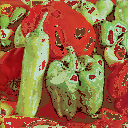

In [ ]:
cv2_imshow(array)

In [ ]:
image = array.astype(np.float32)

In [ ]:
filename = 'compressed.jpg'

In [ ]:
cv2.imwrite(filename, image) 

True